In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [264]:
# Option 1: Try with UTF-8 encoding first
try:
    df = pd.read_csv("C:/Users/HP/Downloads/Top 2000 Companies Financial Data 2024.csv", on_bad_lines='skip', encoding='utf-8')
    print("Data loaded successfully with UTF-8 encoding.")
except Exception as e_utf8:
    print("UTF-8 failed:", e_utf8)

Data loaded successfully with UTF-8 encoding.


In [265]:
print(df.head())         # View the first 5 rows
print(df.columns)        # See column names
print(df.info())         # Understand data types and missing values

   Unnamed: 0                                      Name        Country  \
0           0                             JPMorganChase  United States   
1           1                        Berkshire Hathaway  United States   
2           2  Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia   
3           3                                      ICBC          China   
4           4                           Bank of America  United States   

      Sales    Profit      Assets Market Value  
0  $252.9 B     $50 B  $4,090.7 B     $588.1 B  
1    $369 B   $73.4 B    $1,070 B     $899.1 B  
2  $489.1 B  $116.9 B    $661.5 B   $1,919.3 B  
3  $223.8 B   $50.4 B    $6,586 B     $215.2 B  
4  $183.3 B     $25 B  $3,273.8 B     $307.3 B  
Index(['Unnamed: 0', 'Name', 'Country', 'Sales', 'Profit', 'Assets',
       'Market Value'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype

In [266]:
# Convert monetary values
def convert_money(value):
    if pd.isnull(value):
        return None
    value = value.replace('$', '').replace(',', '').strip()
    multiplier = 1
    if value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    try:
        return float(value) * multiplier
    except:
        return None

In [267]:
# Apply conversion
for col in ['Sales', 'Profit', 'Assets', 'Market Value']:
    df[col] = df[col].apply(convert_money)

In [268]:
# Drop rows with missing values in key columns
df.dropna(subset=['Sales', 'Profit', 'Market Value'], inplace=True)

In [269]:
# Function to plot top 10 companies
def plot_top10(df, column, title, color='Blues_d'):
    top10 = df.sort_values(by=column, ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='Name', data=top10, palette=color)
    plt.title(f'Top 10 Companies by {title}')
    plt.xlabel(f'{title} (USD)')
    plt.ylabel('Company')
    plt.tight_layout()
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4568\2412299609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Name', data=top10, palette=color)


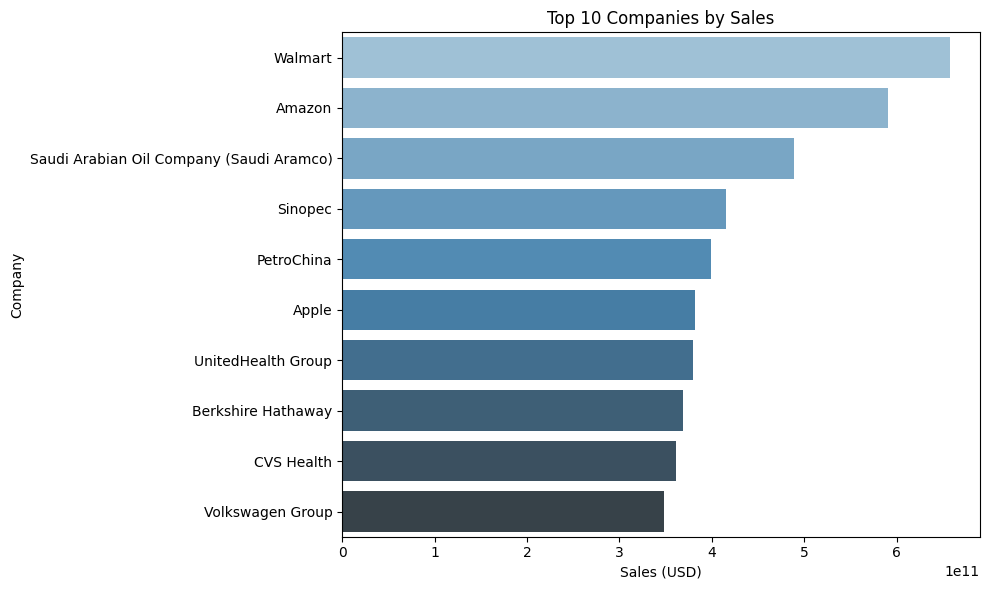

C:\Users\HP\AppData\Local\Temp\ipykernel_4568\2412299609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Name', data=top10, palette=color)


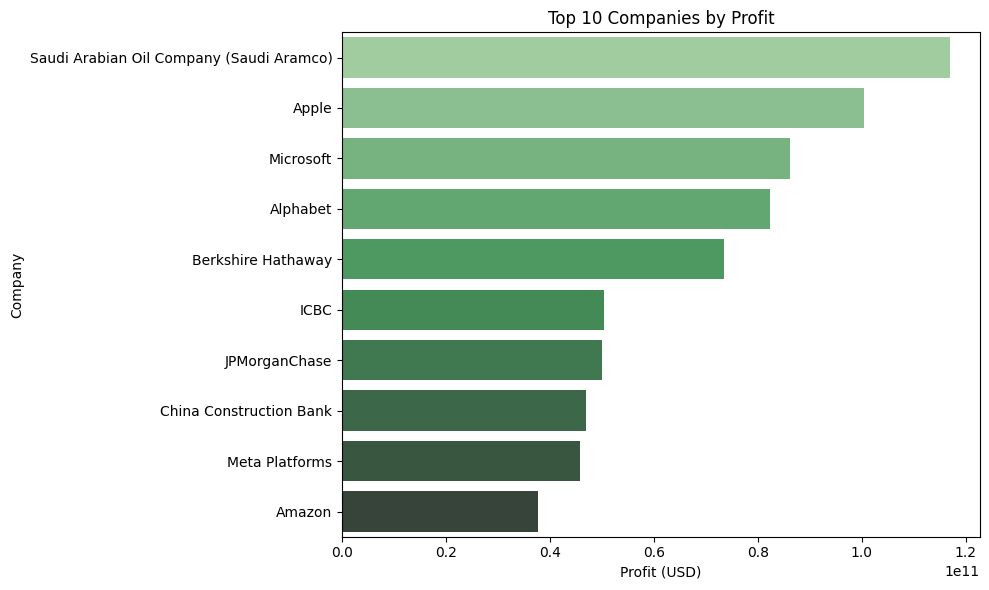

C:\Users\HP\AppData\Local\Temp\ipykernel_4568\2412299609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Name', data=top10, palette=color)


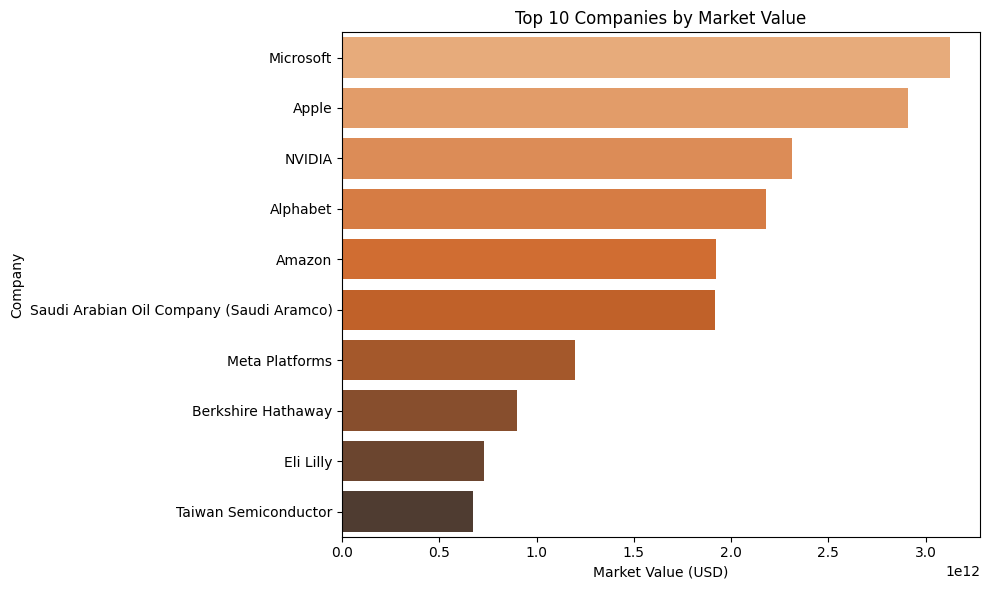

In [270]:
plot_top10(df, 'Sales', 'Sales')
plot_top10(df, 'Profit', 'Profit', color='Greens_d')
plot_top10(df, 'Market Value', 'Market Value', color='Oranges_d')


In [271]:
# Select numerical columns for clustering
features = ['Sales', 'Profit', 'Assets', 'Market Value']
X = df[features].dropna()

In [272]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [273]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change n_clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)

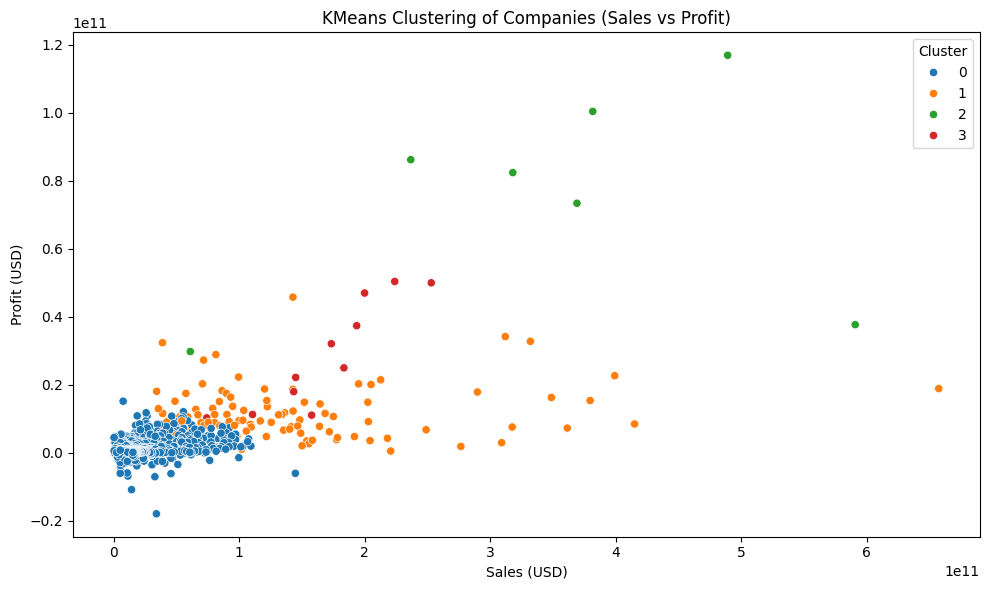

In [274]:
# Visualize clusters (2D plot using Sales vs Profit)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Cluster', palette='tab10')
plt.title('KMeans Clustering of Companies (Sales vs Profit)')
plt.xlabel('Sales (USD)')
plt.ylabel('Profit (USD)')
plt.tight_layout()
plt.show()

In [275]:
#PCA
features = ['Sales', 'Assets', 'Market Value']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [276]:
# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

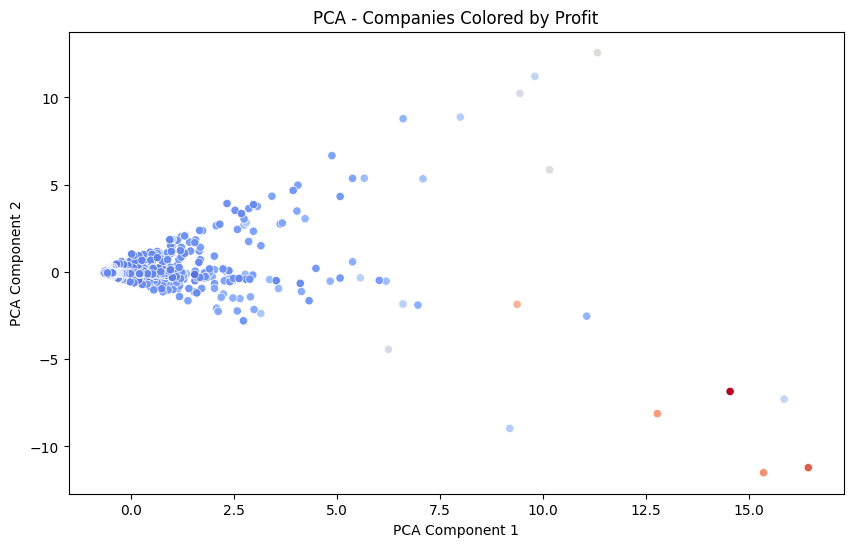

In [277]:
# Visualize PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Profit'], palette='coolwarm', legend=False)
plt.title("PCA - Companies Colored by Profit")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [278]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

In [279]:
# Add PCA components to DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

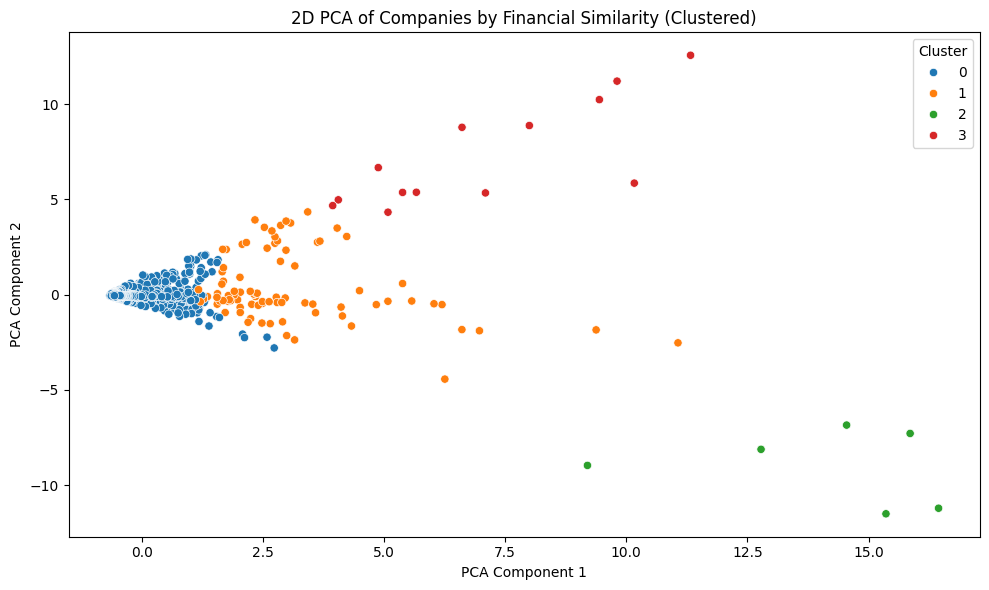

In [280]:
# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title("2D PCA of Companies by Financial Similarity (Clustered)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [281]:
#Regression Models

X = df[features]
y = df['Profit']

In [282]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [283]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print("R²:", round(r2_score(y_test, y_pred_lr), 3))
print("MSE:", round(mean_squared_error(y_test, y_pred_lr), 2))


Linear Regression:
R²: 0.673
MSE: 5.182190658897563e+18


In [284]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Regression:")
print("R²:", round(r2_score(y_test, y_pred_rf), 3))
print("MSE:", round(mean_squared_error(y_test, y_pred_rf), 2))


Random Forest Regression:
R²: 0.559
MSE: 6.988289693540488e+18
